<a href="https://colab.research.google.com/github/maique-batista/maique-batista/blob/circleci-project-setup/Imagetica_motora_Datasets_2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**11 Prática computacional para extração de SMRs**

In [1]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 29.0 MB/s eta 0:00:00


In [ ]:
import gdown
import glob
import math
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

from numpy.fft import fft
from scipy.io import loadmat
from sklearn.model_selection import KFold

In [ ]:
# download data from repository to colab
!gdown --folder https://drive.google.com/drive/folders/16HneXmNNQAgc-H9-wi_XacyWKtHIXLFl?usp=sharing

Retrieving folder list
Processing file 1GAcez3aSnAVYxV370uey241_RwWT2rbi A01T.gdf
Processing file 1ym5EuiurfIKG8yprnTkRpu9PQOa2VIMX A02T.gdf
Processing file 1NhUmvcW42RxXDU-CZiUdoBaVcCHRItji A03T.gdf
Processing file 1eye02q5_lPEJVVq096cg4rrXhhlqdzP- A04T.gdf
Processing file 1s5ChQdSGskpKi_6w3LtEqwouWV_r0RHR A05T.gdf
Processing file 1jkLS1LxONU98OBItxzZhX2Qi3PndIbee A06T.gdf
Processing file 1uctWOyMRhq8od6kSFZNk1TragijwMSvh A07T.gdf
Processing file 1m1wtQNexNeYUN-g1PYKw_RzNVbjBRPZ_ A08T.gdf
Processing file 1tm-0luFkEZQep9IjA5cw2Q6hpJrO7ZRJ A09T.gdf
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1GAcez3aSnAVYxV370uey241_RwWT2rbi
To: /content/smr_data/A01T.gdf
100% 33.6M/33.6M [00:01<00:00, 29.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ym5EuiurfIKG8yprnTkRpu9PQOa2VIMX
To: /content/smr_data/A02T.gdf
100% 33.9M/33.9M [00:00<00:00, 52.2MB/s]
Downloading...
From: https://

In [ ]:
# load data from colab to array
path = '/content/smr_data'
dataFiles = r''+path+'/*.gdf'
files = glob.glob(dataFiles)
files.sort()
event_label = ['769', '770', '771', '772']

for i in range(len(files)):

  print(files[i])
  raw_data = mne.io.read_raw_gdf(files[i])
  info_data = raw_data.info
  eeg_data = raw_data.get_data()
  events, events_id = mne.events_from_annotations(raw_data)
  N_dims = len(eeg_data.shape)

  if i == 0:

    cat_sample_rate = [info_data['sfreq']]
    cat_ch_names = info_data['ch_names']

  else:

    cat_sample_rate = np.hstack((cat_sample_rate, info_data['sfreq']))
    cat_ch_names = np.vstack((cat_ch_names, info_data['ch_names']))

  for j in event_label:

    idx = np.where(events[:, 2]==events_id[j])[0]
    start_event = (events[idx, 0] + 1*cat_sample_rate[i]).astype(int)
    end_event = (events[idx, 0] + 4*cat_sample_rate[i]).astype(int)

    for k in range(len(start_event)):

      seg_data = eeg_data[:, start_event[k]:end_event[k]]

      if k == 0:

        seg_array = np.expand_dims(seg_data, N_dims)

      else:

        seg_array = np.concatenate(
            (seg_array, np.expand_dims(seg_data, N_dims)), N_dims)

    if j == event_label[0]:

      class_array = np.expand_dims(seg_array, N_dims+1)

    else:

      class_array = np.concatenate(
          (class_array, np.expand_dims(seg_array, N_dims+1)), N_dims+1)

  if i == 0:

    data_array = np.expand_dims(class_array, N_dims+2)

  else:

    data_array = np.concatenate(
        (data_array, np.expand_dims(class_array, N_dims+2)), N_dims+2)

data_array = np.swapaxes(data_array, 0, 1)
data_array = np.swapaxes(data_array, 2, 4)
data_array = np.swapaxes(data_array, 2, 3)

/content/smr_data/A01T.gdf
Extracting EDF parameters from /content/smr_data/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A02T.gdf
Extracting EDF parameters from /content/smr_data/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A03T.gdf
Extracting EDF parameters from /content/smr_data/A03T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A04T.gdf
Extracting EDF parameters from /content/smr_data/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A05T.gdf
Extracting EDF parameters from /content/smr_data/A05T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A06T.gdf
Extracting EDF parameters from /content/smr_data/A06T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A07T.gdf
Extracting EDF parameters from /content/smr_data/A07T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A08T.gdf
Extracting EDF parameters from /content/smr_data/A08T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
/content/smr_data/A09T.gdf
Extracting EDF parameters from /content/smr_data/A09T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']


In [ ]:
raw_data = mne.io.read_raw_gdf("A01E.gdf")
print(raw_data)

Extracting EDF parameters from /content/A01E.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
<RawGDF | A01E.gdf, 25 x 687000 (2748.0 s), ~29 kB, data not loaded>


/usr/lib/python3.10/contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


In [ ]:
# basic settings
print(data_array.shape)
sample_rate = cat_sample_rate[0]
ch_names = cat_ch_names[0, :]
N_samples, N_channels, N_class, N_subjects, N_trials = data_array.shape
T = N_samples/sample_rate
t = np.arange(0, T, 1/sample_rate)
f = np.arange(0, sample_rate, 1/T)

(750, 25, 4, 9, 72)


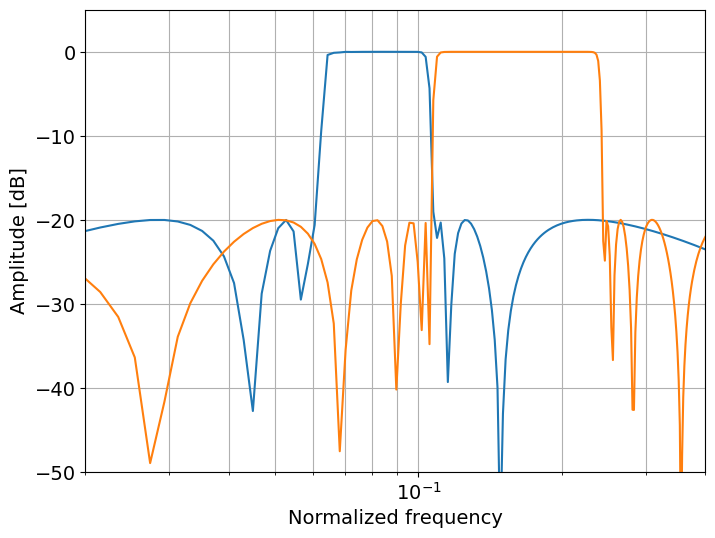

In [ ]:
# alpha and beta filter
fp = np.array([[8, 13], [13.5, 30]])
fs = np.array([[7.5, 13.5], [13, 30.5]])
wp = fp/(sample_rate/2)
ws = fs/(sample_rate/2)

gpass = [1, 3]
gstop = 20

fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)

for i in range(wp.shape[0]):

  N, Wn = signal.cheb2ord(wp[i, :], ws[i, :], gpass[i], gstop)
  b, a = signal.cheby2(N, gstop, Wn, 'bandpass')
  w, h = signal.freqz(b, a)
  ax.semilogx(w/np.pi, 20*np.log10(abs(h)))

ax.set_xlabel('Normalized frequency')
ax.set_ylabel('Amplitude [dB]')
ax.grid(which='both', axis='both')
ax.axis([0.02, 0.4, -50, 5])
plt.show()

In [ ]:
# fft comparing plot function
def fft_comparing_plot(data1, data2, f, ch_names, T, interval):

  N_channels = len(ch_names)
  fig = plt.figure(figsize=(12, 8))
  plt.rcParams.update({"font.size": 14})
  start_plot = math.floor(interval[0]*T)
  end_plot = math.floor(interval[1]*T)

  for i in range(N_channels):

    ax = fig.add_subplot(N_channels, 1, i + 1)
    ax.plot(f[start_plot:end_plot], data1[start_plot:end_plot, i])
    ax.plot(f[start_plot:end_plot], data2[start_plot:end_plot, i])
    ax.set_ylabel(ch_names[i])

    if(i==1):

      ax.set_xlabel('Frequency (Hz)')
      ax.legend(['Left hand', 'Right hand'])

  plt.show()

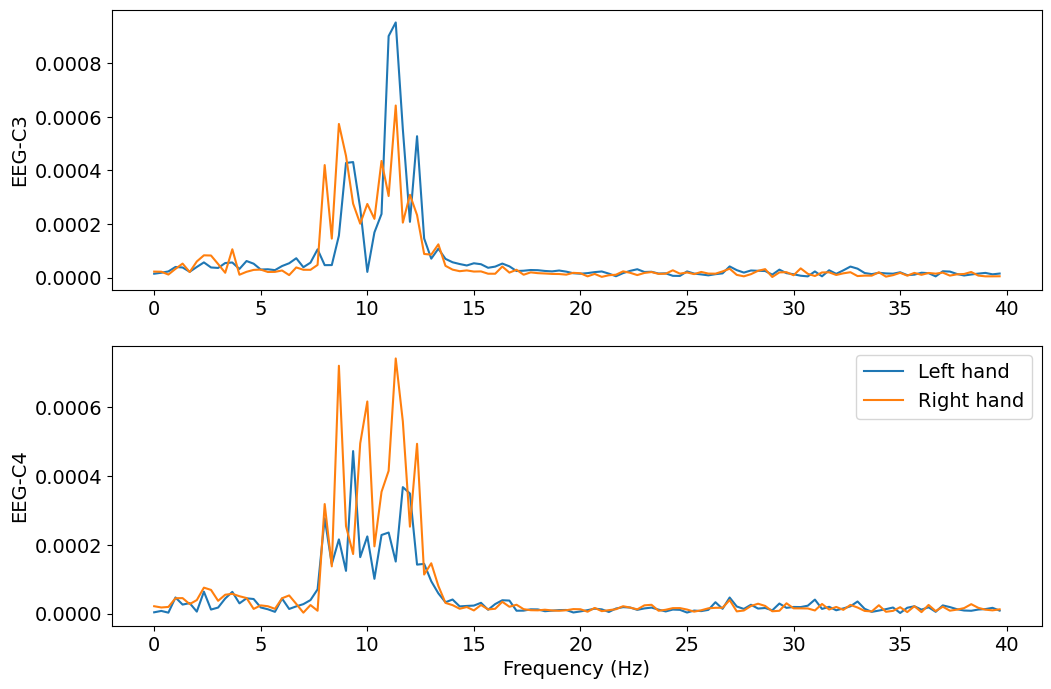

In [ ]:
# alpha fft plot after filtering
right_hand_example = data_array[:, [7, 11], 0, 2, 2]
N_alpha, Wn_alpha = signal.cheb2ord(wp[0, :], ws[0, :], gpass[0], gstop)
sos_alpha = signal.cheby2(N_alpha, gstop, Wn_alpha, 'bandpass', output='sos')
alpha_right_hand = signal.sosfilt(sos_alpha, right_hand_example, axis=0)
fft_alpha_right_hand = np.abs(fft(alpha_right_hand, axis=0))
left_hand_example = data_array[:, [7, 11], 1, 2, 2]
alpha_left_hand = signal.sosfilt(sos_alpha, left_hand_example, axis=0)
fft_alpha_left_hand = np.abs(fft(alpha_left_hand, axis=0))
fft_comparing_plot(fft_alpha_right_hand, fft_alpha_left_hand,
                   f, ch_names[[7, 11]], T, [0, 40])

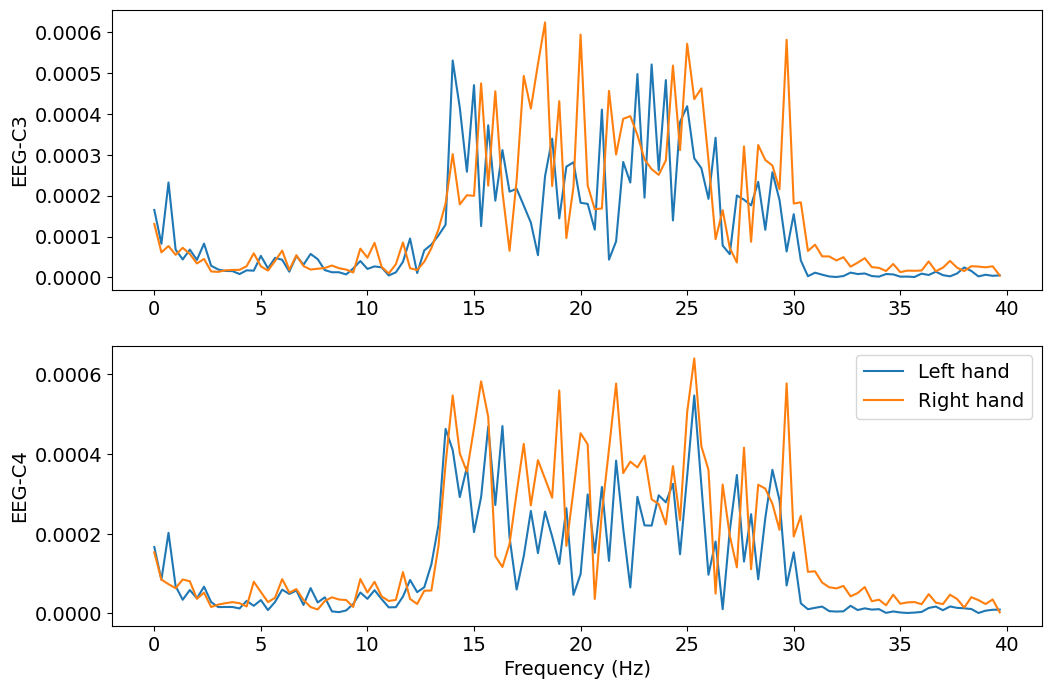

In [ ]:
# beta fft plot after filtering
right_hand_example = data_array[:, [7, 11], 0, 0, 2]
N_beta, Wn_beta = signal.cheb2ord(wp[1, :], ws[1, :], gpass[1], gstop)
sos_beta = signal.cheby2(N_beta, gstop, Wn_beta, 'bandpass', output='sos')
beta_right_hand = signal.sosfilt(sos_beta, right_hand_example, axis=0)
fft_beta_right_hand = np.abs(fft(beta_right_hand, axis=0))
left_hand_example = data_array[:, [7, 11], 0, 1, 2]
beta_left_hand = signal.sosfilt(sos_beta, left_hand_example, axis=0)
fft_beta_left_hand = np.abs(fft(beta_left_hand, axis=0))
fft_comparing_plot(fft_beta_right_hand, fft_beta_left_hand,
                   f, ch_names[[7, 11]], T, [0, 40])

In [ ]:
def segmenting(data, seg_length, sample_rate):

  N_samples, N_channels, N_class, N_subjects, N_trials = data.shape
  N_dims = len(data.shape)
  N_seg = seg_length*sample_rate
  start_seg = np.rint(
      np.arange(0, N_samples*N_trials - N_seg + 1, N_seg)).astype(int)
  end_seg = (start_seg + np.rint(N_seg)).astype(int)

  for i in range(N_trials):

    if i == 0:

      cat_trials = data[:, :, :, :, i]

    else:

      cat_trials = np.concatenate((cat_trials, data[:, :, :, :, i]), axis=0)

  for i in range(len(start_seg)):

    cut_data = cat_trials[start_seg[i]:end_seg[i],]
    expand_data = np.expand_dims(cut_data, N_dims-1)

    if i == 0:

      seg_data = expand_data

    else:

      seg_data = np.concatenate((seg_data, expand_data), N_dims-1)

  return seg_data

In [ ]:
def cov_matrix_estimation(seg_data):

  N_dims = len(seg_data.shape)

  for i in range(seg_data.shape[2]):

    np_cov = np.cov(np.matrix.transpose(seg_data[:, :, i]))
    expand_data = np.expand_dims(np_cov, N_dims-1)

    if i == 0:

      cov_data = expand_data

    else:

      cov_data = np.concatenate((cov_data, expand_data), N_dims-1)

  mean_cov_data = np.mean(cov_data, axis=N_dims-1)

  return mean_cov_data

In [ ]:
def csp_training(S1, S2):

  S2_inv = np.linalg.pinv(S2)
  eigenvalues, eigenvectors = np.linalg.eig(np.matmul(S2_inv, S1))
  idx = np.argsort(eigenvalues)[::-1]
  W = eigenvectors[:, [idx[0], idx[-1]]]

  return W

In [ ]:
def csp_filtering(seg_data, W):

  N_dims = len(seg_data.shape)

  for i in range(seg_data.shape[2]):

    csp = np.matmul(seg_data[:, :, i], W)
    expand_data = np.expand_dims(csp, N_dims-1)

    if i == 0:

      csp_seg_data = expand_data

    else:

      csp_seg_data = np.concatenate((csp_seg_data, expand_data), N_dims-1)

  return csp_seg_data

In [ ]:
# alpha and beta filters
N_alpha, Wn_alpha = signal.cheb2ord(wp[0, :], ws[0, :], gpass[0], gstop)
sos_alpha = signal.cheby2(N_alpha, gstop, Wn_alpha, 'bandpass', output='sos')
N_beta, Wn_beta = signal.cheb2ord(wp[1, :], ws[1, :], gpass[1], gstop)
sos_beta = signal.cheby2(N_beta, gstop, Wn_beta, 'bandpass', output='sos')

# preprossing
seg_data = segmenting(data_array, 2, sample_rate)
alpha_seg_data = signal.sosfilt(sos_alpha, seg_data, axis=0)
beta_seg_data = signal.sosfilt(sos_beta, seg_data, axis=0)

# kfold cross validation
kf = KFold(n_splits=5, shuffle=True)

for i, (train_idx, test_idx) in enumerate(kf.split(range(seg_data.shape[-1]))):

  print(i)

  # csp alpha filtering
  S1 = cov_matrix_estimation(alpha_seg_data[:, :, 0, 2, train_idx])
  S2 = cov_matrix_estimation(alpha_seg_data[:, :, 1, 2, train_idx])
  W_alpha = csp_training(S1, S2)
  csp_alpha_left = csp_filtering(alpha_seg_data[:, :, 0, 2, :], W_alpha)
  csp_alpha_right = csp_filtering(alpha_seg_data[:, :, 1, 2, :], W_alpha)
  csp_alpha_data = np.concatenate(
      (np.expand_dims(csp_alpha_left, axis=2),
       np.expand_dims(csp_alpha_right,axis=2)), axis=2)

  # csp beta filtering
  S1 = cov_matrix_estimation(beta_seg_data[:, :, 0, 2, train_idx])
  S2 = cov_matrix_estimation(beta_seg_data[:, :, 1, 2, train_idx])
  W_beta = csp_training(S1, S2)
  csp_beta_left = csp_filtering(beta_seg_data[:, :, 0, 2, :], W_beta)
  csp_beta_right = csp_filtering(beta_seg_data[:, :, 1, 2, :], W_beta)
  csp_beta_data = np.concatenate(
      (np.expand_dims(csp_beta_left, axis=2),
       np.expand_dims(csp_beta_right,axis=2)), axis=2)

  # feature extraction
  log_var_csp_alpha = np.log(np.var(csp_alpha_data, axis=0))
  log_var_csp_beta = np.log(np.var(csp_beta_data, axis=0))

  if i == 0:

    csp_alpha_test = log_var_csp_alpha[:, :, test_idx]
    csp_beta_test = log_var_csp_beta[:, :, test_idx]

  else:

    csp_alpha_test = np.concatenate(
        (csp_alpha_test, log_var_csp_alpha[:, :, test_idx]), axis=2)
    csp_beta_test = np.concatenate(
        (csp_beta_test, log_var_csp_beta[:, :, test_idx]), axis=2)

0
1
2
3
4


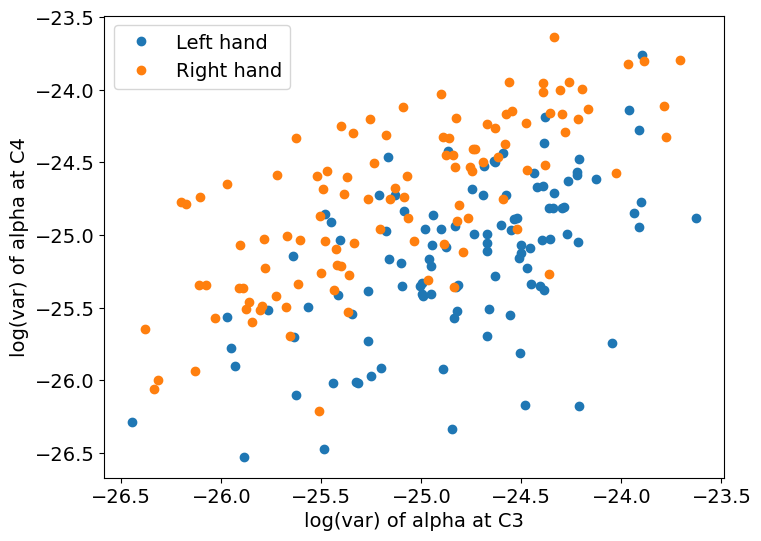

In [ ]:
# alpha feature space before filtering
log_var_alpha = np.log(np.var(alpha_seg_data[:, [7, 11],], axis=0))

fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_var_alpha[0, 0, 2, :], log_var_alpha[1, 0, 2, :], 'o')
ax.plot(log_var_alpha[0, 1, 2, :], log_var_alpha[1, 1, 2, :], 'o')
ax.set_xlabel('log(var) of alpha at C3')
ax.set_ylabel('log(var) of alpha at C4')
ax.legend(['Left hand', 'Right hand'])
plt.show()

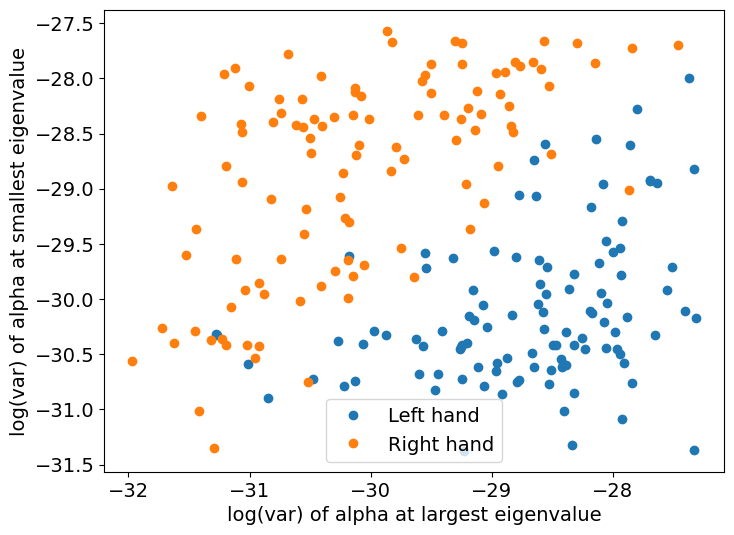

In [ ]:
# alpha feature space after filtering
fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)
ax.plot(csp_alpha_test[0, 0, :], csp_alpha_test[1, 0, :], 'o')
ax.plot(csp_alpha_test[0, 1, :], csp_alpha_test[1, 1, :], 'o')
ax.set_xlabel('log(var) of alpha at largest eigenvalue')
ax.set_ylabel('log(var) of alpha at smallest eigenvalue')
ax.legend(['Left hand', 'Right hand'])
plt.show()

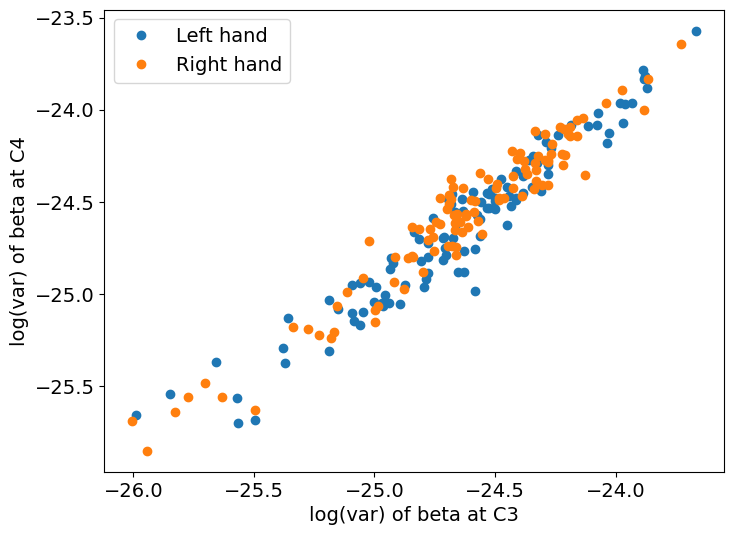

In [ ]:
# beta attribute space before filtering
log_var_beta = np.log(np.var(beta_seg_data[:, [7, 11],], axis=0))

fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)
ax.plot(log_var_beta[0, 0, 2, :], log_var_beta[1, 0, 2, :], 'o')
ax.plot(log_var_beta[0, 1, 2, :], log_var_beta[1, 1, 2, :], 'o')
ax.set_xlabel('log(var) of beta at C3')
ax.set_ylabel('log(var) of beta at C4')
ax.legend(['Left hand', 'Right hand'])
plt.show()

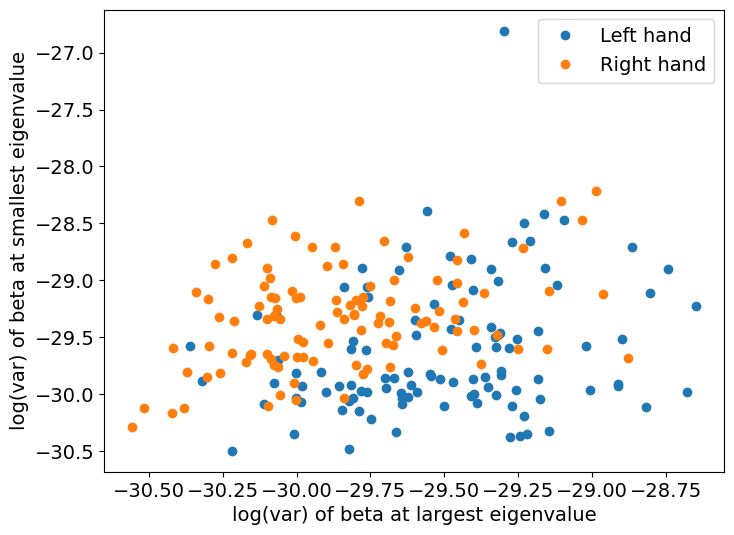

In [ ]:
# beta feature space after filtering
fig = plt.figure(figsize=(8, 6))
plt.rcParams.update({"font.size": 14})
ax = fig.add_subplot(1, 1, 1)
ax.plot(csp_beta_test[0, 0, :], csp_beta_test[1, 0, :], 'o')
ax.plot(csp_beta_test[0, 1, :], csp_beta_test[1, 1, :], 'o')
ax.set_xlabel('log(var) of beta at largest eigenvalue')
ax.set_ylabel('log(var) of beta at smallest eigenvalue')
ax.legend(['Left hand', 'Right hand'])
plt.show()

###**Exercício computacional:** No problema de imagética motora das mãos esquerda e direita, projete um banco de filtros considerando as seguintes faixas de frequência: 4-8 Hz, 8-12 Hz, 12-16 Hz, 16-20 Hz, 20-24 Hz e 24-28 Hz. Agora use o CSP para projetar um banco de filtros espaciais para cada uma das faixas e extraia o logaritmo da variância da saída de cada filtro. Por fim, represente graficamente o espaço de atributos da saída de cada filtro e analise quais faixas de frequência, aparentemente, são mais promissoras.